In [1]:
import pandas as pd
import matplotlib.pyplot as plt

def ma(file):
    df = pd.read_csv(file)
    print(df.describe())
    df['ma'] = df['avg_temp'].rolling(10).mean()
    df.dropna(inplace=True)
    return df

df_city = ma('city_data.csv')
df_global = ma('global_data.csv')
plt.plot(df_city['year'],df_city['ma'],label='Jacksonville')
plt.plot(df_global['year'],df_global['ma'],label='Global')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Temperature (C)')
plt.title('10-year moving averaged temperature')


              year    avg_temp
count   271.000000  266.000000
mean   1878.000000   21.001015
std      78.375166    0.764870
min    1743.000000   16.350000
25%    1810.500000   20.700000
50%    1878.000000   21.090000
75%    1945.500000   21.387500
max    2013.000000   22.680000
              year    avg_temp
count   266.000000  266.000000
mean   1882.500000    8.369474
std      76.931788    0.584747
min    1750.000000    5.780000
25%    1816.250000    8.082500
50%    1882.500000    8.375000
75%    1948.750000    8.707500
max    2015.000000    9.830000


Text(0.5,1,'10-year moving averaged temperature')

 
0.003385 x + 14.65
 
0.004572 x - 0.273


Text(0.5,1,'10-year moving averaged temperature')

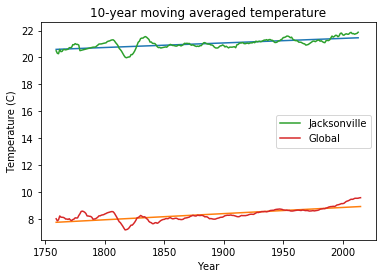

In [2]:
import numpy as np
def trend(df):
    x = df['year']
    y = df['ma']
    z = np.polyfit(x,y,1)
    p = np.poly1d(z)
    print(p)
    plt.plot(x , p(x))
trend(df_city)  
trend(df_global)
plt.plot(df_city['year'],df_city['ma'],label='Jacksonville')
plt.plot(df_global['year'],df_global['ma'],label='Global')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Temperature (C)')
plt.title('10-year moving averaged temperature')

                            OLS Regression Results                            
Dep. Variable:                   ma_y   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     147.5
Date:                Mon, 21 Jan 2019   Prob (F-statistic):           9.75e-27
Time:                        15:35:19   Log-Likelihood:                -97.085
No. Observations:                 240   AIC:                             198.2
Df Residuals:                     238   BIC:                             205.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.5984      1.397     -6.154      0.0

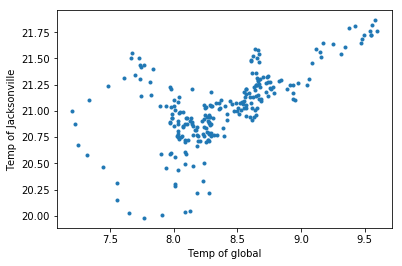

In [4]:
import statsmodels.formula.api as sm
df_all = pd.merge(df_city, df_global,left_index=True, right_index=True, how='inner')
plt.plot(df_all['ma_y'],df_all['ma_x'],'.')
plt.xlabel('Temp of global')
plt.ylabel('Temp of Jacksonville')
result = sm.ols(formula="ma_y ~ ma_x", data=df_all).fit()
print(result.summary())

In [5]:
df_all['ma_x'].corr(df_all['ma_y'])

0.6186170343138332